In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('googleplaystore.csv',encoding="ISO-8859-1")

In [2]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2]:
#dataset[dataset['Reviews']=='3.0M']
#dataset[dataset['Reviews']=='3.0M'] = float(3000000)
#dataset[['Reviews']].apply(pd.to_numeric())
dataset.Reviews = pd.to_numeric(dataset.Reviews)

ValueError: Unable to parse string "3.0M" at position 10472

In [3]:
dataset[dataset['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [3]:
dataset['Reviews'] = dataset['Reviews'].apply(lambda x: float(3000000) if x == '3.0M' else x)

In [12]:
dataset.Reviews = pd.to_numeric(dataset.Reviews)

In [5]:
dataset.Price.describe()

count     10841
unique       93
top           0
freq      10040
Name: Price, dtype: object

In [6]:
dataset[dataset['Type']!='Free']['Price']

234         $4.99
235         $4.99
290         $4.99
291         $4.99
427         $3.99
476         $3.99
477         $6.99
478         $1.49
479         $2.99
480         $3.99
481         $7.99
571         $3.99
851         $3.99
852         $5.99
853         $3.99
854         $3.99
995         $4.99
1001        $2.99
1227        $3.49
1228        $4.99
1327        $2.99
1335        $3.99
1341        $2.99
1347        $2.99
1831        $2.99
1832        $1.99
1833        $4.99
1834        $4.99
1835        $4.99
1836        $5.99
           ...   
10457       $2.99
10459       $1.99
10460       $1.00
10472    Everyone
10517       $1.49
10531       $3.49
10540       $2.99
10570       $1.99
10583       $6.99
10586       $0.99
10594       $1.99
10645       $8.99
10650       $5.49
10651       $6.49
10661       $5.99
10662       $6.49
10664       $6.49
10668       $6.49
10669       $5.99
10674       $5.49
10675       $0.99
10679       $2.99
10682       $0.99
10690       $0.99
10697     

In [2]:
dataset = dataset.drop(dataset[dataset['Price']=='Everyone'].index, axis = 0)

In [15]:
dataset['Price'][10472] 

'Everyone'

In [73]:
#a partir da célula para mostrar os valores de preço que não fossem de apps gratuitos,
#viu-se um valor de preço muito alto e verifico quais os valores dessa linha
dataset[dataset['Price']=='Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000.0,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
len(dataset)

10840

In [3]:
dataset[dataset['Price']=='Everyone'] #para verificar se foi feita a remoção

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [8]:
dataset.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [9]:
dataset.columns[dataset.isna().any()].tolist()#quais colunas possuem valores NaN

['Rating', 'Type', 'Current Ver', 'Android Ver']

In [7]:
dataset[dataset['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [8]:
dataset['Last Updated'] = pd.to_datetime(dataset['Last Updated'])

In [9]:
dataset['Last Updated'].describe()

count                   10840
unique                   1377
top       2018-08-03 00:00:00
freq                      326
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: Last Updated, dtype: object

In [6]:
#visto que há somente 1 ocorrência de Type como NaN, faz-se a alteração sabendo pelo print acima que Price=0
dataset['Type'] = dataset['Type'].apply(lambda x: 'Free' if (x!='Free' and x!='Paid') else x)
dataset.Type.describe()

count     10840
unique        2
top        Free
freq      10040
Name: Type, dtype: object

In [66]:
dataset.Genres.describe()
#dataset[dataset['Type'].isna()]

count     10840
unique      119
top       Tools
freq        842
Name: Genres, dtype: object

In [22]:
dataset[dataset['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61.0,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182.0,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119.0,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654.0,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77.0,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35.0,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30.0,9.9M,"10,000+",Free,0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161.0,2.7M,"10,000+",Free,0,Everyone,Books & Reference,"July 13, 2018",1.0,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2.0,7.2M,"50,000+",Free,0,Everyone,Books & Reference,"June 15, 2018",3.0,6.0 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114.0,7.3M,"100,000+",Free,0,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up


In [23]:
dataset[dataset['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55.0,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145.0,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010.0,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0.0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179.0,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44.0,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1.0,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8.0,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [24]:
dataset[dataset['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230.0,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189.0,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [10]:
dataset['Type'] = dataset['Type'].astype("category")
dataset['Content Rating'] = dataset['Content Rating'].astype("category") 
dataset['Category'] = dataset['Category'].astype("category") 
dataset['Installs'] = dataset['Installs'].astype("category")

In [26]:
dataset.dtypes

App                object
Category             int8
Rating            float64
Reviews             int64
Size               object
Installs             int8
Type                 int8
Price             float64
Content Rating       int8
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
dataset['Type'] = dataset['Type'].cat.codes
dataset['Content Rating'] = dataset['Content Rating'].cat.codes
dataset['Category'] = dataset['Category'].cat.codes
dataset['Installs'] = dataset['Installs'].cat.codes

dataset.corr(method='spearman')
#dataset['App'] = dataset['App'].astype('str')
#dataset.dtypes

,Category,Rating,Installs,Type,Content Rating
Category,1.000000,-0.024757,0.007241,0.015947,-0.108551
Rating,-0.024757,1.000000,0.014971,0.065266,-0.013999
Installs,0.007241,0.014971,1.000000,-0.061321,0.033303
Type,0.015947,0.065266,-0.061321,1.000000,-0.047497
Content Rating,-0.108551,-0.013999,0.033303,-0.047497,1.000000


In [27]:
dataset['Type'].describe()

count    10840.000000
mean         0.073708
std          0.261661
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Type, dtype: float64

In [29]:
#teste de hipótese para ver média de notas entre apps pagos e gratuitos
apps_free = dataset[dataset['Type']==0]['Rating']
apps_paid = dataset[dataset['Type']==1]['Rating']
print(len(apps_free))
print(len(apps_paid))

10039
800


In [30]:
from scipy import stats
import seaborn as sb
import matplotlib.pyplot as plt

stats.mannwhitneyu(apps_free,apps_paid)

MannwhitneyuResult(statistic=3428972.5, pvalue=2.5377327648945917e-12)

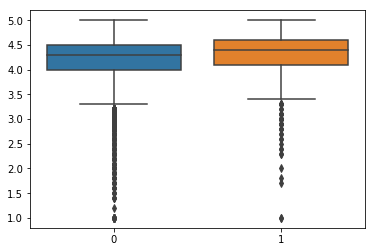

In [31]:
sb.boxplot(data=[apps_free,apps_paid])

In [32]:
print(apps_free.mean())
print(apps_free.median())
print(apps_paid.mean())
print(apps_paid.median())

4.186202546163551
4.3
4.26661514683153
4.4


/home/milena/Documentos/datascience-if1015/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


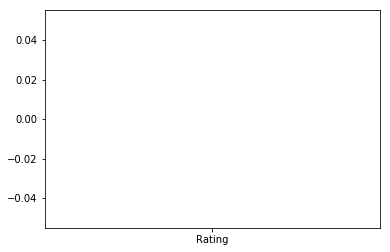

In [33]:
(apps_free-apps_paid).plot(kind='box')

In [34]:
#preenchendo os NaN utilizando valores aleatórios de min e max
dataset.columns[dataset.isna().any()].tolist()

['Rating', 'Current Ver', 'Android Ver']

In [35]:
import random
dataset.Rating.fillna(random.randint(dataset.Rating.min(),dataset.Rating.max()),inplace=True)
dataset.Rating.describe()

count    10840.000000
mean         3.757749
std          1.194298
min          1.000000
25%          3.700000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [29]:
dataset['Type'] = dataset['Type'].apply(lambda x: 0 if x==-1 else x)
dataset[dataset['Type']==-1]
#dataset.corr(method="spearman")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
#teste de hipótese para qtd de instalações entre apps pagos e gratuitos
#apps_free = dataset[dataset['Type']==0]['Installs']
#apps_paid = dataset[dataset['Type']==1]['Installs']
#stats.mannwhitneyu(apps_free,apps_paid)
dataset.corr(method="spearman")

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
Category,1.000000,-0.024757,0.053004,0.007241,0.015947,0.014985,-0.108551
Rating,-0.024757,1.000000,0.156490,0.014971,0.065266,0.064280,-0.013999
Reviews,0.053004,0.156490,1.000000,0.136829,-0.171667,-0.170549,0.180239
Installs,0.007241,0.014971,0.136829,1.000000,-0.061321,-0.061817,0.033303
Type,0.015947,0.065266,-0.171667,-0.061321,1.000000,0.999034,-0.047497
Price,0.014985,0.064280,-0.170549,-0.061817,0.999034,1.000000,-0.046909
Content Rating,-0.108551,-0.013999,0.180239,0.033303,-0.047497,-0.046909,1.000000


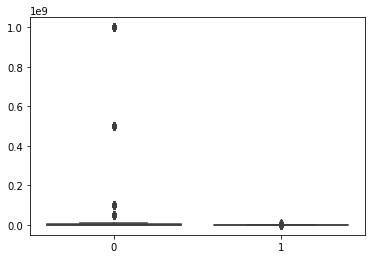

In [42]:
sb.boxplot(data=[apps_free,apps_paid])

In [31]:
#imputar dados, já que quase 1,5mil linhas estão com ratings vazio
from fancyimpute import KNN
apps_knn = KNN(k=3).fit_transform(dataset)

ModuleNotFoundError: No module named 'fancyimpute'

In [54]:
#normalizando toda a base - talvez não seja necessário
datasetNorm = dataset[['Category','Type','Rating','Reviews','Installs','Content Rating']]
datasetNorm = datasetNorm-datasetNorm.mean()/datasetNorm.std()
datasetNorm.head()

,Category,Type,Rating,Reviews,Installs,Content Rating
0,-2.002245,-0.281695,0.953592,158.848296,9.999818e+03,-0.456081
1,-2.002245,-0.281695,0.753592,966.848296,4.999998e+05,-0.456081
2,-2.002245,-0.281695,1.553592,87509.848296,5.000000e+06,-0.456081
3,-2.002245,-0.281695,1.353592,215643.848296,5.000000e+07,2.543919
4,-2.002245,-0.281695,1.153592,966.848296,9.999982e+04,-0.456081


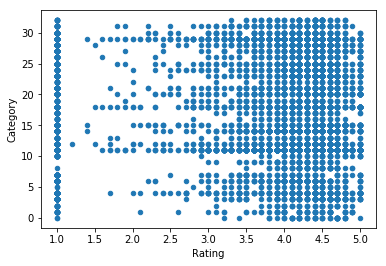

In [59]:
dataset.plot.scatter(x='Rating',y='Category')

In [57]:
dataset.drop_duplicates(subset=['App'],keep=False, inplace=True)
print(len(dataset))

8861


In [58]:
dataset.corr(method='spearman')

,Category,Rating,Reviews,Installs,Type,Content Rating
Category,1.000000,-0.011174,0.063619,0.070360,0.013213,-0.104664
Rating,-0.011174,1.000000,0.431436,0.350505,0.027015,0.038279
Reviews,0.063619,0.431436,1.000000,0.964734,-0.135950,0.155445
Installs,0.070360,0.350505,0.964734,1.000000,-0.223577,0.128878
Type,0.013213,0.027015,-0.135950,-0.223577,1.000000,-0.030569
Content Rating,-0.104664,0.038279,0.155445,0.128878,-0.030569,1.000000


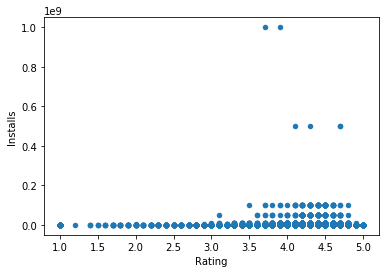

In [60]:
dataset.plot.scatter(x='Rating',y='Installs')

In [26]:
dataset.Size.describe()

count                  10840
unique                   461
top       Varies with device
freq                    1695
Name: Size, dtype: object

In [10]:
dataset.Installs.describe()

count          10840
unique            21
top       1,000,000+
freq            1579
Name: Installs, dtype: object

In [29]:
#para ver quão parecidas são essas colunas entre si, crio um dataframe contendo somente as duas colunas
#e faço a transformação nas strings (_and_ vira &), para em seguida saber a porcentagem de quantas entradas
# da coluna category são substring das entradas em genres, e ver se essa última coluna deve ser removida do dataset original
copy_dataset = dataset[['Category','Genres']]
copy_dataset.head()

,Category,Genres
0,ART_AND_DESIGN,Art & Design
1,ART_AND_DESIGN,Art & Design;Pretend Play
2,ART_AND_DESIGN,Art & Design
3,ART_AND_DESIGN,Art & Design
4,ART_AND_DESIGN,Art & Design;Creativity


In [30]:
copy_dataset['Category'] = copy_dataset['Category'].apply(lambda x: x.lower())
copy_dataset['Genres'] = copy_dataset['Genres'].apply(lambda x: x.lower())
copy_dataset.head()

/home/CIN/mscc/Documents/if1015datascience/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/CIN/mscc/Documents/if1015datascience/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Category,Genres
0,art_and_design,art & design
1,art_and_design,art & design;pretend play
2,art_and_design,art & design
3,art_and_design,art & design
4,art_and_design,art & design;creativity


In [38]:
aux=copy_dataset['Category'][0]

print(aux[:aux.index('_')]+' & '+aux[aux.rindex('_')+1:])
print(copy_dataset['Genres'][0])

art & design
art & design


In [39]:
copy_dataset['Category'] = copy_dataset['Category'].apply(lambda x: x[:x.index('_')]+' & '+x[x.rindex('_')+1:] if x.find('_and_')>-1 else x)

/home/CIN/mscc/Documents/if1015datascience/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
copy_dataset['Category'].head()

0    art & design
1    art & design
2    art & design
3    art & design
4    art & design
Name: Category, dtype: object

In [59]:
copy_dataset = copy_dataset.drop('eql',1)
copy_dataset.head()
#copy_dataset['eql'] = copy_dataset.apply(lambda x: True if x[1].find(x[0]) >-1 else False)

,Category,Genres
0,art & design,art & design
1,art & design,art & design;pretend play
2,art & design,art & design
3,art & design,art & design
4,art & design,art & design;creativity


In [60]:
copy_dataset['eql'] = copy_dataset.apply(lambda x: x[0] in x[1], axis=1)
copy_dataset.eql.head()

0    True
1    True
2    True
3    True
4    True
Name: eql, dtype: bool

In [61]:
copy_dataset.eql.describe()

count     10840
unique        2
top        True
freq       7550
Name: eql, dtype: object

In [62]:
print(7550*100/10840)

69.64944649446494


In [67]:
dataset.Category.describe()

count      10840
unique        33
top       FAMILY
freq        1972
Name: Category, dtype: object

In [15]:
dataset['Price'] = dataset['Price'].apply(lambda x: x[x.find('$')+1:] if x.find('$')>-1 else x)
#dataset[dataset['Price_Temp']!='0'].head()

In [16]:
dataset['Price'] = pd.to_numeric(dataset['Price'])

In [17]:
dataset.Price.describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

In [21]:
dataset[dataset['Price']==400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_Temp
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,400.00


In [18]:
dataset = dataset.drop('Price_Temp', axis = 1)